In [1]:
import pandas as pd
from pathlib import Path
from IPython.display import display

In [2]:
# 데이터 폴더
BASE_DIR = Path("../datasets/감정분류대화음성/감정 분류를 위한 대화 음성 데이터셋")   # 실제 경로로 수정
csv_paths = [
    BASE_DIR / "4차" / "4차년도.csv",
    BASE_DIR / "5차" / "5차년도.csv",
    BASE_DIR / "5_2차" / "5차년도_2차.csv"
]

In [3]:
dfs = []
for path in csv_paths:
    df = pd.read_csv(path,encoding='cp949')
    df["source"] = path.stem   # 데이터 출처 표시 (4차/5차/5_2차)
    dfs.append(df)

In [4]:
# 통합
all_df = pd.concat(dfs, ignore_index=True)
display(all_df.shape)
all_df.head()

(43991, 16)

,wav_id,발화문,상황,1번 감정,1번 감정세기,2번 감정,2번 감정세기,3번 감정,3번 감정세기,4번 감정,4번감정세기,5번 감정,5번 감정세기,나이,성별,source
0,5e258fd1305bcf3ad153a6a4,"어, 청소 니가 대신 해 줘!",anger,Neutral,0,Angry,1,Neutral,0,Neutral,0,Angry,1,27,male,4차년도
1,5e258fe2305bcf3ad153a6a5,둘 다 청소 하기 싫어. 귀찮아.,anger,Neutral,0,Angry,1,Neutral,0,Neutral,0,Angry,1,27,male,4차년도
2,5e258ff5305bcf3ad153a6a6,둘 다 하기 싫어서 화내.,anger,Angry,1,Angry,1,Neutral,0,Angry,1,Angry,1,27,male,4차년도
3,5e25902f305bcf3ad153a6a9,그럼 방세는 어떡해.,anger,Sadness,1,Sadness,1,Sadness,1,Sadness,1,Sadness,1,27,male,4차년도
4,5e27f90b5807b852d9e0157b,권태긴줄 알았는데 다른 사람이 생겼나보더라고.,sad,Sadness,1,Sadness,1,Sadness,1,Sadness,2,Sadness,1,32,male,4차년도


In [5]:
# 컬럼 확인
display(all_df.columns)

# 결측치
display(all_df.isna().sum())

# 감정 라벨 분포
display(all_df["상황"].value_counts())   # 상황(Scenario)
display(all_df["1번 감정"].value_counts())   # annotator 라벨 예시

Index(['wav_id', '발화문', '상황', '1번 감정', '1번 감정세기', '2번 감정', '2번 감정세기', '3번 감정',
       '3번 감정세기', '4번 감정', '4번감정세기', '5번 감정', '5번 감정세기', '나이', '성별', 'source'],
      dtype='object')

wav_id     0
발화문        0
상황         0
1번 감정      0
1번 감정세기    0
2번 감정      0
2번 감정세기    0
3번 감정      0
3번 감정세기    0
4번 감정      0
4번감정세기     0
5번 감정      0
5번 감정세기    0
나이         0
성별         0
source     0
dtype: int64

상황
sad          11152
anger         8372
disgust       4660
happiness     4548
fear          4131
angry         3263
neutral       3262
sadness       2848
surprise      1755
Name: count, dtype: int64

1번 감정
Sadness      10591
neutral       6825
Neutral       5133
Angry         4386
happiness     3066
sadness       2824
disgust       2252
Disgust       2125
Fear          1759
surprise      1739
fear          1351
angry         1317
Happiness      443
Surprise       180
Name: count, dtype: int64

In [26]:
label_map = {
    "Sadness": "sad",
    "Angry": "angry",
    "Disgust": "disgust",
    "Fear": "fear",
    "Neutral": "neutral",
    "Happiness": "happiness",
    "Surprise": "surprise",
    # 소문자로 들어온 것도 맞춤
    "sad": "sad", "anger": "angry", "disgust": "disgust", "fear": "fear",
    "neutral": "neutral", "happiness": "happiness", "surprise": "surprise",

    "sadness": "sad",
    "anger": "angry",
    "angry": "angry",
    "disgust": "disgust",
    "fear": "fear",
    "neutral": "neutral",
    "happiness": "happiness",
    "surprise": "surprise"
}

# annotator 5명 감정 모두 표준화
for i in range(1, 6):
    col = f"{i}번 감정"
    all_df[col] = all_df[col].map(label_map)


In [30]:
# df['final_emotion'] = df['final_emotion'].map(label_map).fillna(df['final_emotion'])
all_df['상황'] = all_df['상황'].map(label_map).fillna(all_df['상황'])

In [31]:
all_df['상황'].value_counts()

상황
sad          14000
angry        11635
disgust       4660
happiness     4548
fear          4131
neutral       3262
surprise      1755
Name: count, dtype: int64

In [7]:
all_df

,wav_id,발화문,상황,1번 감정,1번 감정세기,2번 감정,2번 감정세기,3번 감정,3번 감정세기,4번 감정,4번감정세기,5번 감정,5번 감정세기,나이,성별,source
0,5e258fd1305bcf3ad153a6a4,"어, 청소 니가 대신 해 줘!",anger,neutral,0,angry,1,neutral,0,neutral,0,angry,1,27,male,4차년도
1,5e258fe2305bcf3ad153a6a5,둘 다 청소 하기 싫어. 귀찮아.,anger,neutral,0,angry,1,neutral,0,neutral,0,angry,1,27,male,4차년도
2,5e258ff5305bcf3ad153a6a6,둘 다 하기 싫어서 화내.,anger,angry,1,angry,1,neutral,0,angry,1,angry,1,27,male,4차년도
3,5e25902f305bcf3ad153a6a9,그럼 방세는 어떡해.,anger,sad,1,sad,1,sad,1,sad,1,sad,1,27,male,4차년도
4,5e27f90b5807b852d9e0157b,권태긴줄 알았는데 다른 사람이 생겼나보더라고.,sad,sad,1,sad,1,sad,1,sad,2,sad,1,32,male,4차년도
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43986,5fbe313c44697678c497c05a,나 엘리베이터에 갇혔어.,fear,happiness,1,NaN,1,NaN,2,NaN,1,NaN,1,23,female,5차년도_2차
43987,5fbe251044697678c497bfb8,하지만 기분이 나쁜 걸 어떡해?,angry,NaN,1,fear,1,NaN,2,NaN,1,neutral,0,23,female,5차년도_2차
43988,5fbe31584c55eb78bd7cee7f,자취방 엘리베이턴데 정전인가봐.,fear,NaN,1,neutral,0,NaN,2,fear,1,NaN,1,23,female,5차년도_2차
43989,5fbe2f8544697678c497c047,나 드디어 프로젝트 끝났어!,happiness,disgust,1,NaN,1,neutral,0,happiness,1,NaN,1,23,female,5차년도_2차


In [8]:
from collections import Counter

def majority_vote(row):
    labels = [row[f"{i}번 감정"] for i in range(1, 6)]
    labels = [l for l in labels if pd.notna(l)]
    if not labels:
        return None
    return Counter(labels).most_common(1)[0][0]

all_df["final_emotion"] = all_df.apply(majority_vote, axis=1)

display(all_df["final_emotion"].value_counts())


final_emotion
sad          13190
neutral      10260
angry         6095
happiness     4246
disgust       4009
fear          3290
surprise      1437
Name: count, dtype: int64

In [9]:
all_df["final_emotion"]

0          neutral
1          neutral
2            angry
3              sad
4              sad
           ...    
43986    happiness
43987         fear
43988      neutral
43989      disgust
43990      neutral
Name: final_emotion, Length: 43991, dtype: object

In [32]:
# 상황 라벨 vs 최종 라벨 교차분석
cross_tab = pd.crosstab(all_df["상황"], all_df["final_emotion"], normalize="index") * 100
display(cross_tab.round(1).style.background_gradient(cmap="Blues"))


final_emotion,angry,disgust,fear,happiness,neutral,sad,surprise
상황,,,,,,,
angry,50.800000,10.700000,1.100000,2.100000,15.000000,19.000000,1.300000
disgust,9.100000,53.300000,0.800000,1.600000,24.500000,8.400000,2.400000
fear,0.100000,0.500000,64.200000,1.500000,24.200000,8.100000,1.400000
happiness,0.000000,0.300000,0.300000,70.800000,25.500000,0.000000,3.100000
neutral,0.000000,6.800000,3.800000,9.400000,75.400000,0.000000,4.600000
sad,0.400000,0.600000,1.600000,2.500000,15.900000,78.600000,0.300000
surprise,0.000000,1.400000,7.400000,1.600000,43.800000,0.000000,45.800000


count    42527.000000
mean         0.800177
std          0.201602
min          0.200000
25%          0.600000
50%          0.800000
75%          1.000000
max          1.000000
Name: agreement_ratio, dtype: float64

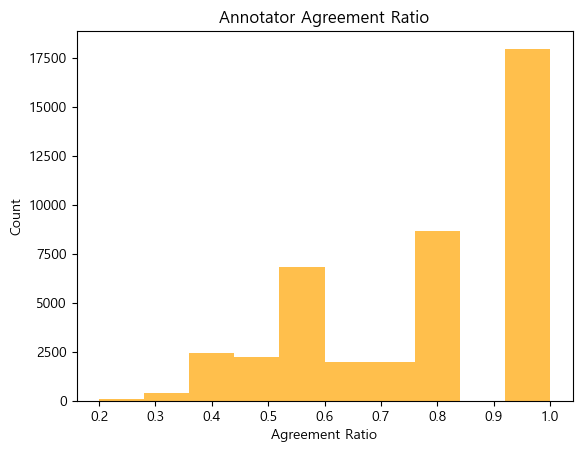

In [11]:
from collections import Counter

def label_agreement(row):
    labels = [row[f"{i}번 감정"] for i in range(1, 6) if pd.notna(row[f"{i}번 감정"])]
    cnt = Counter(labels)
    if not cnt: return None
    most_common = cnt.most_common(1)[0][1]  # 최빈 감정 투표 수
    return most_common / len(labels)        # 합의율 (0.2~1.0)

all_df["agreement_ratio"] = all_df.apply(label_agreement, axis=1)

# 합의율 분포 확인
display(all_df["agreement_ratio"].describe())

# 합의율 히스토그램
import matplotlib.pyplot as plt
plt.hist(all_df["agreement_ratio"], bins=10, color="orange", alpha=0.7)
plt.title("Annotator Agreement Ratio")
plt.xlabel("Agreement Ratio")
plt.ylabel("Count")
plt.show()


In [12]:
all_df.columns

Index(['wav_id', '발화문', '상황', '1번 감정', '1번 감정세기', '2번 감정', '2번 감정세기', '3번 감정',
       '3번 감정세기', '4번 감정', '4번감정세기', '5번 감정', '5번 감정세기', '나이', '성별', 'source',
       'final_emotion', 'agreement_ratio'],
      dtype='object')

In [13]:
# 특정 컬럼만 딱 바꾸기
all_df = all_df.rename(columns={"4번감정세기": "4번 감정세기"})

In [14]:
all_df.columns

Index(['wav_id', '발화문', '상황', '1번 감정', '1번 감정세기', '2번 감정', '2번 감정세기', '3번 감정',
       '3번 감정세기', '4번 감정', '4번 감정세기', '5번 감정', '5번 감정세기', '나이', '성별', 'source',
       'final_emotion', 'agreement_ratio'],
      dtype='object')

,avg_intensity
final_emotion,
neutral,0.520799
happiness,1.130334
surprise,1.222269
sad,1.246217
fear,1.287416
angry,1.311993
disgust,1.376253


C:\Users\phoen\AppData\Local\Temp\ipykernel_10572\693035125.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=all_df, x="final_emotion", y="avg_intensity", palette="Set3")


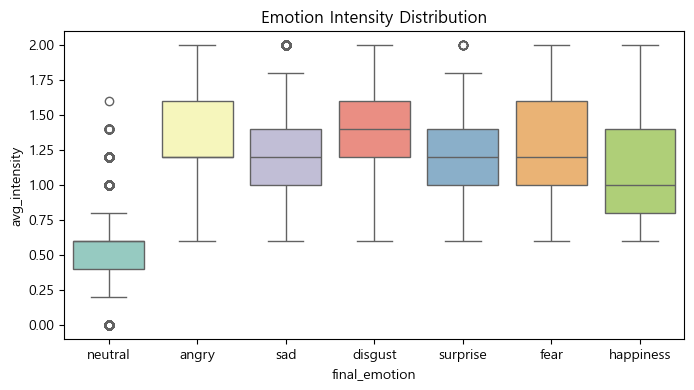

In [15]:
# 각 발화의 평균 감정세기 (0~2)
intensity_cols = [f"{i}번 감정세기" for i in range(1, 6)]
all_df["avg_intensity"] = all_df[intensity_cols].mean(axis=1)

# 감정별 평균 강도
emotion_intensity = all_df.groupby("final_emotion")["avg_intensity"].mean().sort_values()

display(emotion_intensity.to_frame("avg_intensity")
        .style.background_gradient(cmap="Reds"))

# 박스플롯 시각화
import seaborn as sns
plt.figure(figsize=(8,4))
sns.boxplot(data=all_df, x="final_emotion", y="avg_intensity", palette="Set3")
plt.title("Emotion Intensity Distribution")
plt.show()


In [16]:
all_df.shape

(43991, 19)

count    43991.000000
mean        25.985611
std         13.452465
min          1.000000
25%         16.000000
50%         23.000000
75%         32.000000
max        137.000000
Name: utter_len, dtype: float64

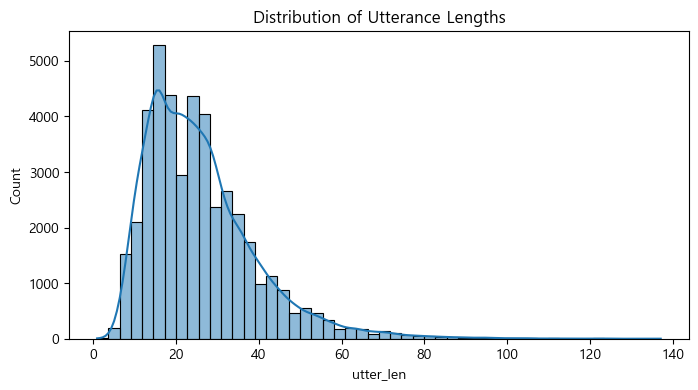

C:\Users\phoen\AppData\Local\Temp\ipykernel_10572\4015176068.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=all_df, x="final_emotion", y="utter_len", palette="Set2")


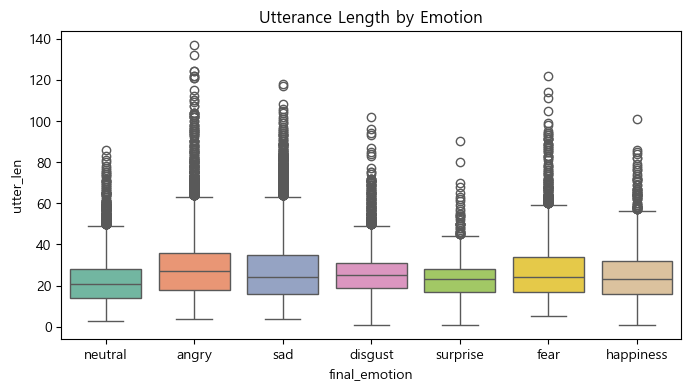

In [17]:
all_df["utter_len"] = all_df["발화문"].str.len()
display(all_df["utter_len"].describe())

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.histplot(all_df["utter_len"], bins=50, kde=True)
plt.title("Distribution of Utterance Lengths")
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(data=all_df, x="final_emotion", y="utter_len", palette="Set2")
plt.title("Utterance Length by Emotion")
plt.show()

,Count
final_emotion,
sad,13190
neutral,10260
angry,6095
happiness,4246
disgust,4009
fear,3290
surprise,1437


C:\Users\phoen\AppData\Local\Temp\ipykernel_10572\3869496952.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="Set2")


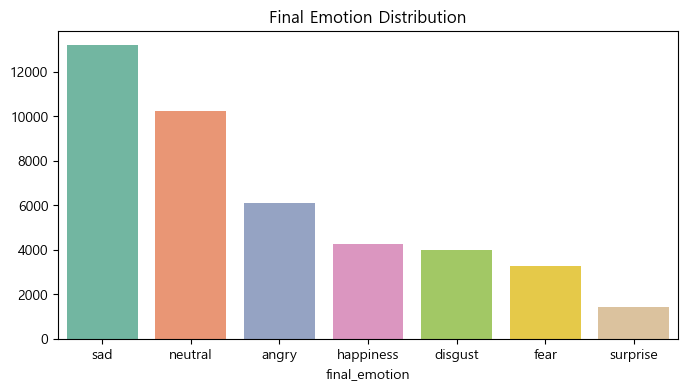

In [18]:
label_counts = all_df["final_emotion"].value_counts()
display(label_counts.to_frame("Count"))

plt.figure(figsize=(8,4))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="Set2")
plt.title("Final Emotion Distribution")
plt.show()
